In [1]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt


In [7]:
# read ../input/small_0.csv line by line without pandas
dists = []
with open('../input/small_0.csv', 'r') as f:
    for i, line in enumerate(f):
        if i > 20:
            dists.append(line.split(','))
            dists[-1] = [float(x) for x in dists[-1]]

dists

[[10.6, 5.3, 4.3, 5.5, 3.2, 3.9, 7.1, 5.8, 5.8, 2.9],
 [1.2, 6.1, 7.1, 5.9, 8.1, 10.4, 4.2, 5.6, 5.5, 9.5],
 [2.9, 2.8, 4.6, 2.9, 4.9, 7.2, 2.8, 2.6, 2.3, 6.2],
 [7.5, 2.1, 3.9, 2.3, 3.7, 2.2, 4.0, 2.6, 2.7, 1.3],
 [9.0, 3.6, 3.3, 3.8, 3.1, 1.2, 5.5, 4.1, 4.2, 0.3],
 [4.4, 9.8, 10.8, 9.6, 11.8, 14.1, 7.9, 9.3, 9.2, 13.2],
 [2.1, 3.2, 4.2, 3.0, 5.3, 7.6, 1.4, 2.7, 2.7, 6.6],
 [2.3, 3.1, 4.0, 2.9, 5.1, 7.4, 1.2, 2.6, 2.9, 6.4],
 [3.9, 2.3, 2.4, 1.3, 3.5, 5.8, 1.4, 1.5, 3.8, 4.8],
 [3.7, 4.8, 5.8, 4.6, 6.9, 9.2, 3.5, 4.3, 4.2, 8.2]]

In [9]:
dists_df = pd.DataFrame(dists)
dists_df

,0,1,2,3,4,5,6,7,8,9
0,10.6,5.3,4.3,5.5,3.2,3.9,7.1,5.8,5.8,2.9
1,1.2,6.1,7.1,5.9,8.1,10.4,4.2,5.6,5.5,9.5
2,2.9,2.8,4.6,2.9,4.9,7.2,2.8,2.6,2.3,6.2
3,7.5,2.1,3.9,2.3,3.7,2.2,4.0,2.6,2.7,1.3
4,9.0,3.6,3.3,3.8,3.1,1.2,5.5,4.1,4.2,0.3
5,4.4,9.8,10.8,9.6,11.8,14.1,7.9,9.3,9.2,13.2
6,2.1,3.2,4.2,3.0,5.3,7.6,1.4,2.7,2.7,6.6
7,2.3,3.1,4.0,2.9,5.1,7.4,1.2,2.6,2.9,6.4
8,3.9,2.3,2.4,1.3,3.5,5.8,1.4,1.5,3.8,4.8
9,3.7,4.8,5.8,4.6,6.9,9.2,3.5,4.3,4.2,8.2


In [36]:
solution = pd.read_csv('../output/small_0_data.csv')
solution

,taxi_id,pax_id,dist
0,0,5,3.9
1,1,2,7.1
2,2,8,2.3
3,3,6,4.0
4,4,0,9.0
5,5,4,11.8
6,6,7,2.7
7,7,1,3.1
8,8,9,4.8
9,9,3,4.6


In [19]:
dist_cost = [  
                (9.0 , 3.2),
                (3.1 , 5.6),
                (7.1 , 2.8),
                (4.6 , 1.3),
                (11.8, 1.2),
                (3.9 , 4.4),
                (4.0 , 3.0),
                (2.7 , 1.2),
                (2.3 , 2.4),
                (4.8 , 4.2),
            ]


In [38]:
for d, c in dist_cost:
    # itter over solutions
    for i, row in solution.iterrows():
        if row["dist"] == d:
            solution.at[i, "cost"] = c

solution

,taxi_id,pax_id,dist,cost
0,0,5,3.9,4.4
1,1,2,7.1,2.8
2,2,8,2.3,2.4
3,3,6,4.0,3.0
4,4,0,9.0,3.2
5,5,4,11.8,1.2
6,6,7,2.7,1.2
7,7,1,3.1,5.6
8,8,9,4.8,4.2
9,9,3,4.6,1.3


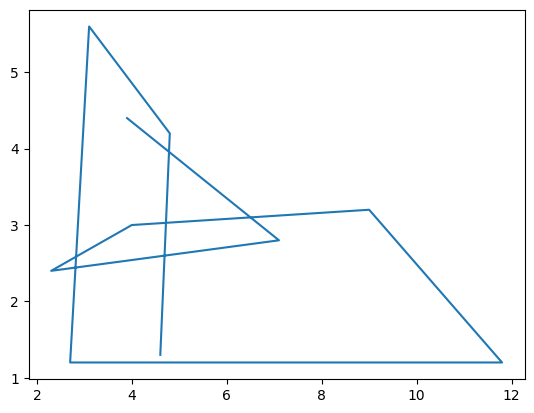

In [40]:
# plot solution["dist"] vs solution["cost"]

plt.plot(solution["dist"], solution["cost"])
plt.show()

In [41]:
# sort solution by dist

sorted_solution = solution.sort_values(by=['dist'])
sorted_solution

,taxi_id,pax_id,dist,cost
2,2,8,2.3,2.4
6,6,7,2.7,1.2
7,7,1,3.1,5.6
0,0,5,3.9,4.4
3,3,6,4.0,3.0
9,9,3,4.6,1.3
8,8,9,4.8,4.2
1,1,2,7.1,2.8
4,4,0,9.0,3.2
5,5,4,11.8,1.2


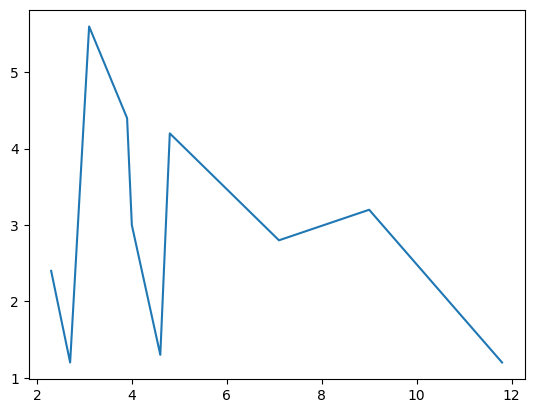

In [42]:
# plot solution["dist"] vs solution["cost"]

plt.plot(sorted_solution["dist"], sorted_solution["cost"])
plt.show()

In [31]:
def cost_by_dist(dist, dist_cost):
    vr = []
    for i, (d, c) in enumerate(dist_cost):
        if d == dist:
            vr.append(c)
    return vr

In [35]:
# Find all ocurrences of a solution dist in the dists_df

costs = []

taxi_ids = list(solution["taxi_id"])
pax_ids = list(solution["pax_id"])
taxi_pax = list(zip(taxi_ids, pax_ids))

for taxi in range(len(dists)):
    for pax in range(len(dists[taxi])):
        for c in cost_by_dist(dists[taxi][pax], dist_cost):
            #print(f'Taxi {taxi} pax {pax} cost {c} dist {dists[taxi][pax]}')

            for i, (t, p) in enumerate(taxi_pax):
                if t == taxi and p == pax:
                    print(f'Found in solution: {i}')
                    print(f'Taxi {taxi} pax {pax} cost {c} dist {dists[taxi][pax]}')
                    costs.append(c)

solution["cost"] = pd.Series(costs)
solution

Found in solution: 0
Taxi 0 pax 5 cost 4.4 dist 3.9
Found in solution: 1
Taxi 1 pax 2 cost 2.8 dist 7.1
Found in solution: 2
Taxi 2 pax 8 cost 2.4 dist 2.3
Found in solution: 3
Taxi 3 pax 6 cost 3.0 dist 4.0
Found in solution: 4
Taxi 4 pax 0 cost 3.2 dist 9.0
Found in solution: 5
Taxi 5 pax 4 cost 1.2 dist 11.8
Found in solution: 6
Taxi 6 pax 7 cost 1.2 dist 2.7
Found in solution: 7
Taxi 7 pax 1 cost 5.6 dist 3.1
Found in solution: 8
Taxi 8 pax 9 cost 4.2 dist 4.8
Found in solution: 9
Taxi 9 pax 3 cost 1.3 dist 4.6


,taxi_id,pax_id,dist,cost
0,0,5,3.9,4.4
1,1,2,7.1,2.8
2,2,8,2.3,2.4
3,3,6,4.0,3.0
4,4,0,9.0,3.2
5,5,4,11.8,1.2
6,6,7,2.7,1.2
7,7,1,3.1,5.6
8,8,9,4.8,4.2
9,9,3,4.6,1.3
